<a href="https://colab.research.google.com/github/skm08/transformers/blob/main/Text_to_Image_Generation_with_Diffusion_and_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install diffusers transformers gradio accelerate

In [27]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [28]:
!pip show torch

Name: torch
Version: 2.4.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchvision


In [29]:
model_id1 = 'dreamlike-art/dreamlike-diffusion-1.0'
model_id2 = 'stabilityai/stable-diffusion-xl-base-1.0'

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to('cuda')

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [30]:
prompt = """dreamlike, a grungy girl with raibow hair, travelling between dimensions, long hair straight down, torn kawai shirt and boggy jeans"""

In [31]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

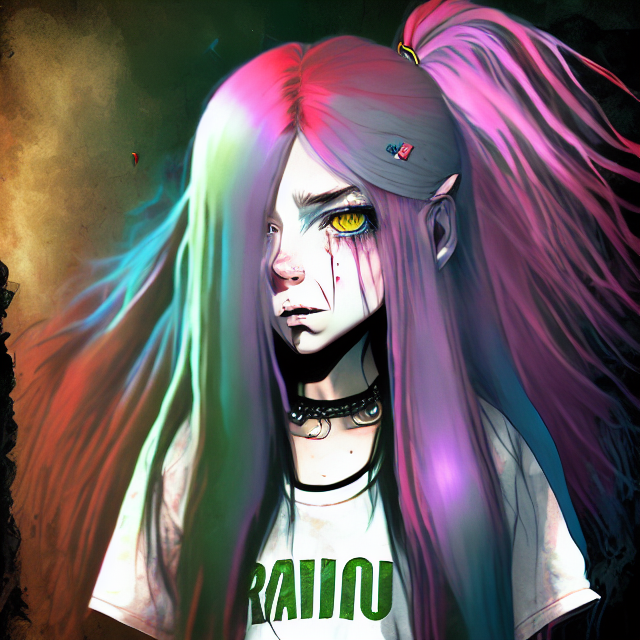

In [32]:
image

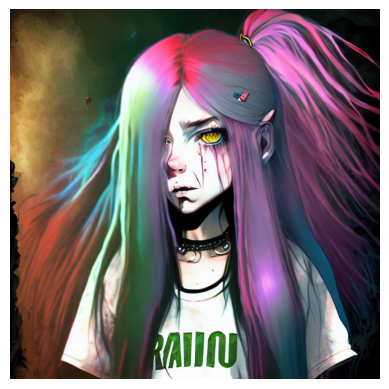

In [33]:
plt.imshow(image);
plt.axis('off');

In [37]:
def generate_image(pipe,prompt,params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images > 1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [38]:
prompt = """The most ugly thing in the universe"""
params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

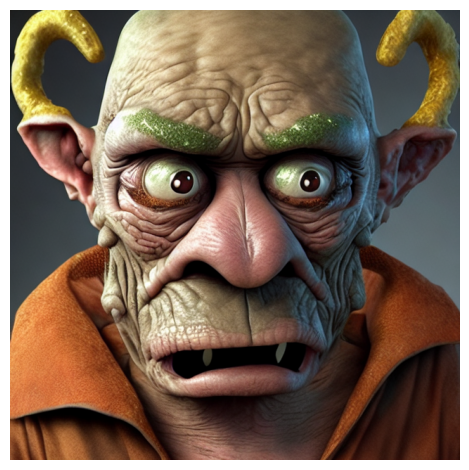

In [39]:
generate_image(pipe,prompt,params)

  0%|          | 0/50 [00:00<?, ?it/s]

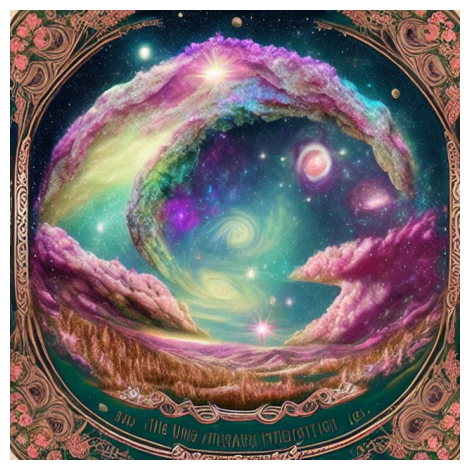

In [40]:
prompt = """The most pretty thing in the universe"""
params = {}

generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

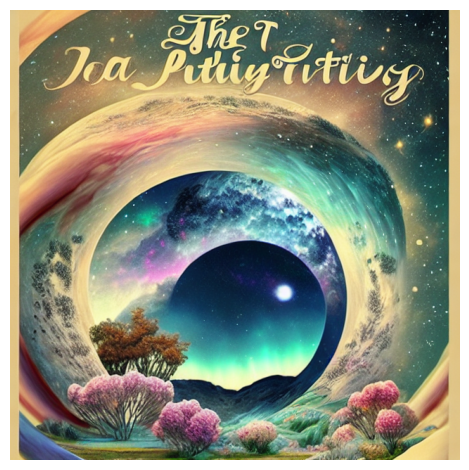

In [41]:
params = {'num_inference_steps': 100}

generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

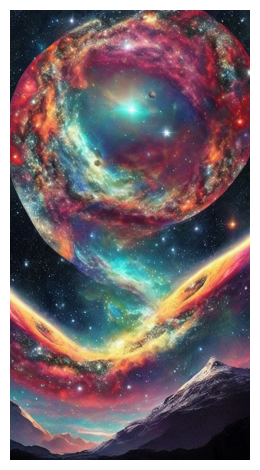

In [42]:
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

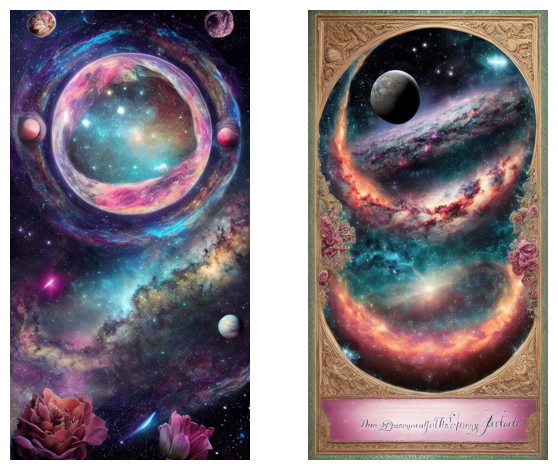

In [43]:
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640), 'num_images_per_prompt': 2}

generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

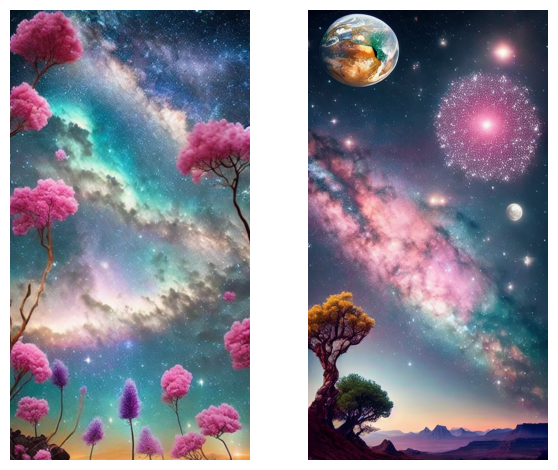

In [44]:
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640), 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe,prompt,params)